***TASK 2 - IMAGE FILTERING USING CONVOLUTION 2D WITH DIFFERENT KERNEL SIZE, PADDING AND STRIDE. COMPUTING ENTROPY FOR EACH IMAGE.***

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

Loading the image

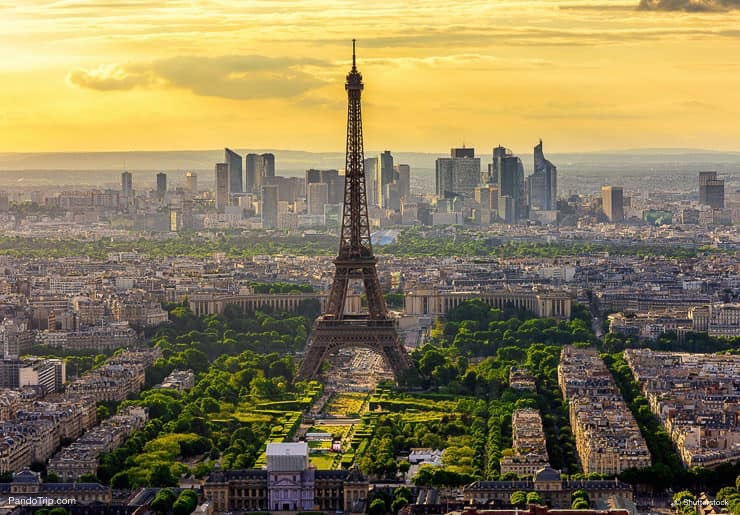

In [ ]:
coloured_image = cv2.imread("/content/Eiffel_Tower.jpg")
#print(coloured_image)
cv2_imshow(coloured_image)

entropy of original image

In [57]:
import skimage.measure    
entropy_coloured_image = skimage.measure.shannon_entropy(coloured_image)
print("Entropy of coloured image:")
print(entropy_coloured_image)

Entropy of coloured image:
7.848797274835159


converting image to gray scale

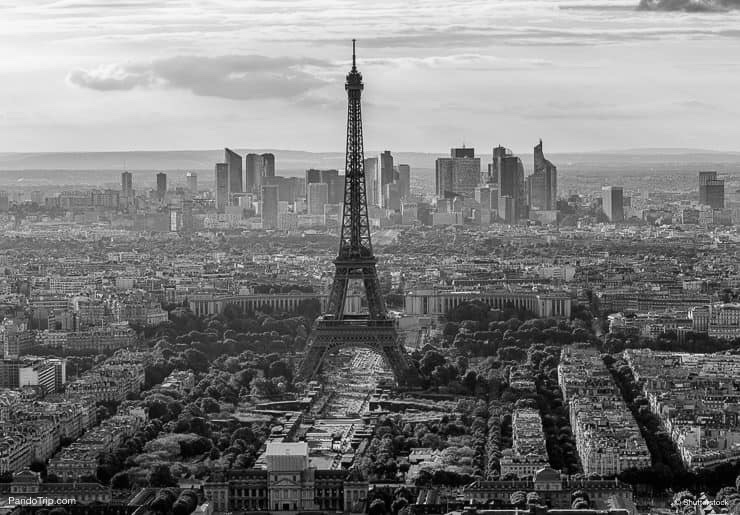

In [ ]:
grey_image = cv2.cvtColor(coloured_image, cv2.COLOR_BGR2GRAY)
cv2_imshow(grey_image)

In [58]:
import skimage.measure    
entropy_grey_image = skimage.measure.shannon_entropy(grey_image)
print("Entropy of grey image:")
print(entropy_grey_image)

Entropy of grey image:
7.832869398867498


size of the input image

In [ ]:
print('image matrix size: ', grey_image.shape)

image matrix size:  (515, 740)


In [ ]:
print('\n First 5 columns and rows of the image matrix: \n', grey_image[:5, :5])


 First 5 columns and rows of the image matrix: 
 [[244 243 243 243 242]
 [240 240 240 239 239]
 [240 240 240 240 240]
 [242 242 243 243 243]
 [239 239 240 240 241]]


Exploring the top left corner of the image

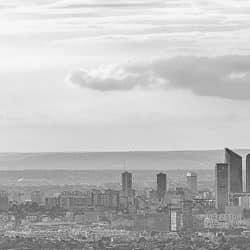

In [ ]:
cv2.imwrite('/content/TopLeft5x5.jpg', grey_image[:250, :250])
c_image = cv2.imread('/content/TopLeft5x5.jpg')
cv2_imshow(c_image)

In [ ]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
import cv2
from matplotlib import pyplot as plt

**computing the filter image of size 3 and stride=1**

In [ ]:
grey_image.shape
filter_size=3
stride=1

In [ ]:
def convolve2D(image, kernel, padding=0, strides=1):
    # Cross Correlation
    kernel = np.flipud(np.fliplr(kernel))

    # Gather Shapes of Kernel + Image + Padding
    xKernShape = kernel.shape[0]
    yKernShape = kernel.shape[1]
    xImgShape = image.shape[0]
    yImgShape = image.shape[1]

    # Shape of Output Convolution
    xOutput = int(((xImgShape - xKernShape + 2 * padding) / strides) + 1)
    yOutput = int(((yImgShape - yKernShape + 2 * padding) / strides) + 1)
    output = np.zeros((xOutput, yOutput))

    # Apply Equal Padding to All Sides
    if padding != 0:
        imagePadded = np.zeros((image.shape[0] + padding*2, image.shape[1] + padding*2))
        imagePadded[int(padding):int(-1 * padding), int(padding):int(-1 * padding)] = image
        print(imagePadded)
    else:
        imagePadded = image

    # Iterate through image
    for y in range(image.shape[1]):
        # Exit Convolution
        if y > image.shape[1] - yKernShape:
            break
        # Only Convolve if y has gone down by the specified Strides
        if y % strides == 0:
            for x in range(image.shape[0]):
                # Go to next row once kernel is out of bounds
                if x > image.shape[0] - xKernShape:
                    break
                try:
                    # Only Convolve if x has moved by the specified Strides
                    if x % strides == 0:
                        output[x, y] = (kernel * imagePadded[x: x + xKernShape, y: y + yKernShape]).sum()
                except:
                    break

    return output

In [ ]:
kernel = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]])
# Convolve and Save Output
output = convolve2D(grey_image, kernel)
cv2.imwrite('2DConvolved.jpg', output)

True

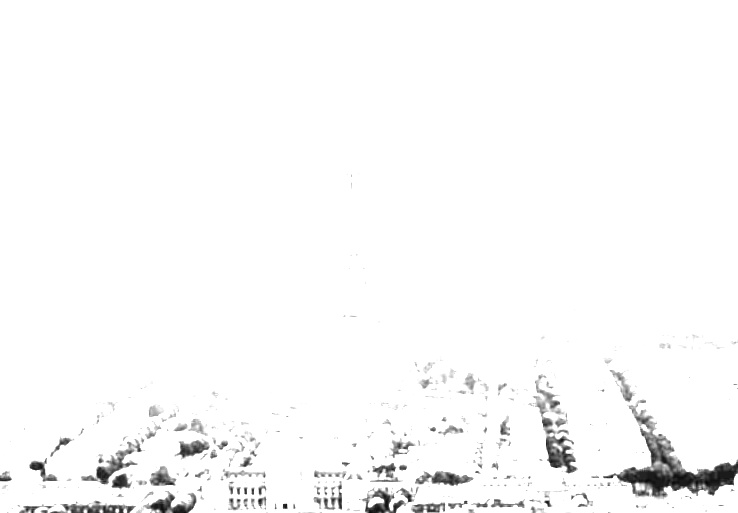

In [ ]:
c_image = cv2.imread("/content/2DConvolved.jpg")
cv2_imshow(c_image)

Entropy for size 3 and stride 1

In [19]:
import skimage.measure    
entropy_33conv_image = skimage.measure.shannon_entropy(c_image)
print("Entropy of size 3 convolved image:")
print(entropy_33conv_image)

Entropy of size 3 convolved image:
0.9608383903313753


**Computing the filter image for size 5 and stride 1**

In [20]:
grey_image.shape
filter_size=5
stride=1

In [26]:
kernel = np.array([[1, 1, 1,1,1], [1, 1, 1,1,1], [1, 1, 1,1,1], [1, 1, 1,1,1], [1, 1, 1,1,1]])
# Convolve and Save Output
output2 = convolve2D(grey_image, kernel)
cv2.imwrite('2DConvolved_2.jpg', output2)

True

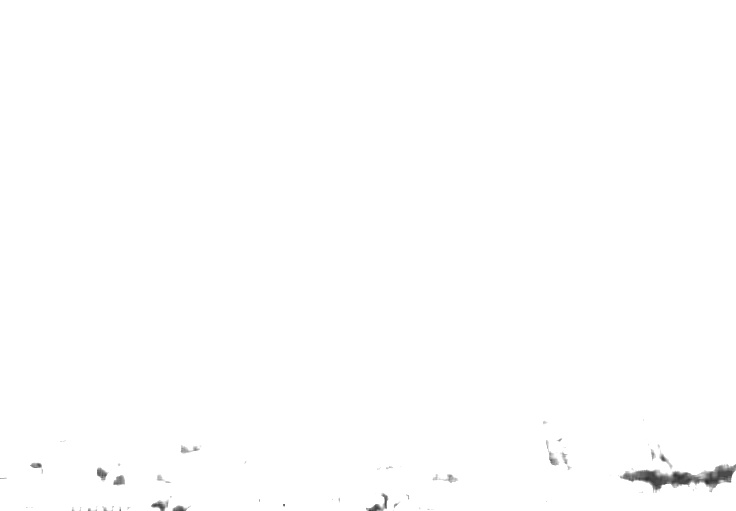

In [27]:
c_image2 = cv2.imread("/content/2DConvolved_2.jpg")
cv2_imshow(c_image2)

Entropy for size 5 and stride 1

In [28]:
import skimage.measure    
entropy_55conv_image = skimage.measure.shannon_entropy(c_image2)
print("Entropy of size 5 convolved image:")
print(entropy_55conv_image)

Entropy of size 5 convolved image:
0.21137004012297056


**Computing filter image for size 3 and stride 2**

In [34]:
stride=2
filter_size=3

In [35]:
kernel = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]])
# Convolve and Save Output
output12 = convolve2D(grey_image, kernel)
cv2.imwrite('2DConvolved12.jpg', output)

True

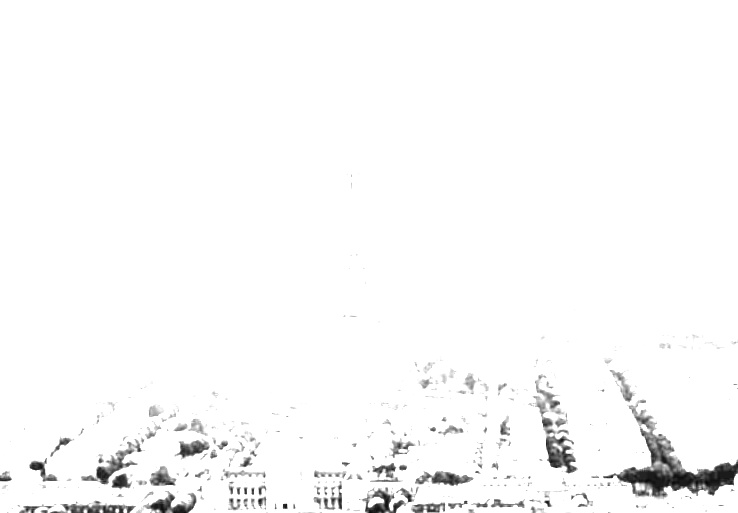

In [36]:
c_image12 = cv2.imread("/content/2DConvolved12.jpg")
cv2_imshow(c_image12)

Entropy for size 3 and stride 2

In [38]:
import skimage.measure    
entropy_332conv_image = skimage.measure.shannon_entropy(c_image12)
print("Entropy of size 3 convolved image with stride 2:")
print(entropy_332conv_image)

Entropy of size 3 convolved image with stride 2:
0.9608383903313753


**Computing filter image for size 5 and stride 2**

In [25]:
stride=2
filter_size=5

In [30]:
kernel = np.array([[1, 1, 1,1,1], [1, 1, 1,1,1], [1, 1, 1,1,1],[1, 1, 1,1,1], [1, 1, 1,1,1]])
# Convolve and Save Output
output22 = convolve2D(grey_image, kernel,strides=2)
cv2.imwrite('2DConvolved_22.jpg', output22)

True

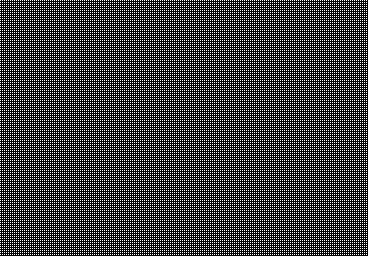

In [32]:
c_image22 = cv2.imread("/content/2DConvolved_22.jpg")
cv2_imshow(c_image22)

Entropy for size 5 and stride 2

In [33]:
import skimage.measure    
entropy_552conv_image = skimage.measure.shannon_entropy(c_image22)
print("Entropy of size 5 convolved image with stride 2:")
print(entropy_552conv_image)

Entropy of size 5 convolved image with stride 2:
1.8220261124092634


**Computing filter image with zero padding**

In [40]:
def convolve2d2(image, kernel):
    # Flip the kernel
    kernel = np.flipud(np.fliplr(kernel))
    # convolution output
    output = np.zeros_like(image)

    # Add zero padding to the input image
    image_padded = np.zeros((image.shape[0] + 2, image.shape[1] + 2))
    image_padded[1:-1, 1:-1] = image

    # Loop over every pixel of the image
    for x in range(image.shape[1]):
        for y in range(image.shape[0]):
            # element-wise multiplication of the kernel and the image
            output[y, x] = (kernel * image_padded[y: y+3, x: x+3]).sum()

    return output

used sharpen filter

In [41]:
# kernel to be used to get sharpened image
KERNEL = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
image_sharpen = convolve2d2(grey_image, kernel=KERNEL)
cv2.imwrite('sharpened_image.jpg', image_sharpen)

True

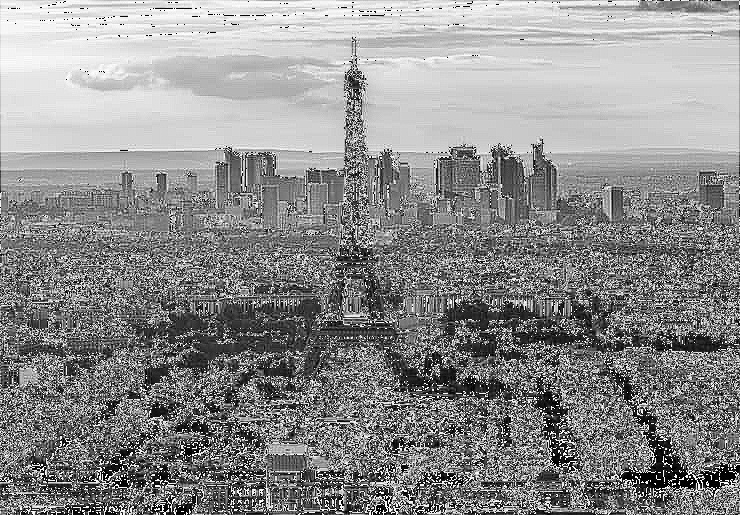

In [42]:
sharp_image33 = cv2.imread("/content/sharpened_image.jpg")
cv2_imshow(sharp_image33)

Entropy of sharpen filter image

In [54]:
import skimage.measure    
entropy_sharp_image = skimage.measure.shannon_entropy(sharp_image33)
print("Entropy of size 3 sharp image:")
print(entropy_sharp_image)

Entropy of size 3 sharp image:
7.901836148068854


Used blur filter on image

In [52]:
# kernel to be used for box blur
imageboxblur = convolve2d2(grey_image, kernel=np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]])/9.0)
cv2.imwrite('box_blur.jpg', imageboxblur)

True

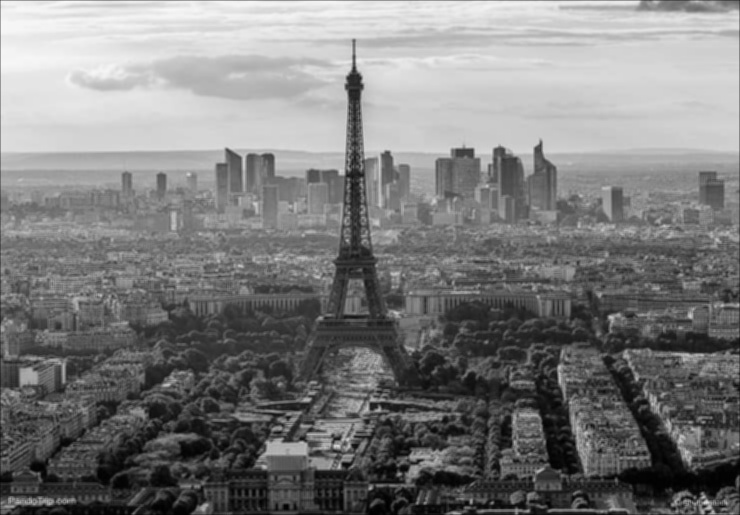

In [53]:
blur_image33 = cv2.imread("/content/box_blur.jpg")
cv2_imshow(blur_image33)

Entropy for blur image

In [56]:
import skimage.measure    
entropy_blur_image = skimage.measure.shannon_entropy(blur_image33)
print("Entropy of size 3 blur image:")
print(entropy_blur_image)

Entropy of size 3 blur image:
7.775707794653998
